In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Import Dataset 

In [2]:
moviedata = pd.read_csv('AfterEDA-cleaning.csv')
moviedata.head(n = 10)

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
5,5,6,Room,2010s,7,18+,8.1,93,1,Drama,Ireland,English,118
6,6,7,Monty Python and the Holy Grail,1970s,47,7+,8.2,97,1,Adventure,United Kingdom,English,91
7,7,8,Indiana Jones and the Last Crusade,1980s,33,13+,8.2,88,1,Action,United States,English,127
8,8,9,Groundhog Day,1990s,29,7+,8.0,96,1,Comedy,United States,English,101
9,9,10,The King's Speech,2010s,12,18+,8.0,95,1,Biography,United Kingdom,English,118


In [3]:
moviedata.describe()

,Unnamed: 0,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000
mean,2362.500000,2363.500000,15.049937,6.162103,59.498096,1.059670,99.975667
std,1364.423016,1364.423016,13.878385,1.059222,22.423813,0.241325,14.374258
min,0.000000,1.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1181.250000,1182.250000,5.000000,5.500000,45.000000,1.000000,90.000000
50%,2362.500000,2363.500000,11.000000,6.200000,60.000000,1.000000,98.000000
75%,3543.750000,3544.750000,20.000000,6.900000,76.000000,1.000000,109.000000
max,4725.000000,4726.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [4]:
# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,4718,4719,Morning Light,2000s,14,7+,5.8,47,1,Documentary,United States,English,100
4720,4720,4721,Walt & El Grupo,2000s,14,7+,6.5,47,1,Documentary,United States,English,106
4721,4721,4722,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
4722,4722,4723,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93


In [5]:
moviedata.describe()

,Unnamed: 0,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000
mean,2359.232718,2360.232718,14.978746,6.151095,59.410047,1.060112,99.709532
std,1360.674745,1360.674745,13.744383,1.056198,22.438429,0.242193,13.675964
min,0.000000,1.000000,1.000000,1.100000,2.000000,1.000000,62.000000
25%,1181.250000,1182.250000,5.000000,5.500000,45.000000,1.000000,90.000000
50%,2354.500000,2355.500000,11.000000,6.200000,60.000000,1.000000,98.000000
75%,3536.750000,3537.750000,20.000000,6.900000,76.000000,1.000000,108.000000
max,4723.000000,4724.000000,102.000000,9.000000,100.000000,3.000000,137.000000


In [6]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Unnamed: 0,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,0,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,2,1,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,3,2,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,4,3,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,5,4,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,4654,4718,Morning Light,2000s,14,7+,5.8,47,1,Documentary,United States,English,100
4654,4655,4720,Walt & El Grupo,2000s,14,7+,6.5,47,1,Documentary,United States,English,106
4655,4656,4721,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
4656,4657,4722,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93


In [7]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4658 non-null   int64  
 1   Unnamed: 0    4658 non-null   int64  
 2   Title         4658 non-null   object 
 3   Decade        4658 non-null   object 
 4   Age of Movie  4658 non-null   int64  
 5   Age Category  4658 non-null   object 
 6   IMDb          4658 non-null   float64
 7   Rotten        4658 non-null   int64  
 8   Availability  4658 non-null   int64  
 9   Genres        4658 non-null   object 
 10  Country       4658 non-null   object 
 11  Language      4658 non-null   object 
 12  Runtime       4658 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 473.2+ KB


Using Uni-Variate Linear Regression, test out various Numeric Variables to see which Variables can predict the IMDb Scores the most accurately.

Set up the Regression Problem with Train & Test Datasets

Intercept (Age of Movie):     b = [5.99266093]
Coefficients (Age of Movie):  a = [[0.01061027]]

              Age of Movie      IMDb
Age of Movie      1.000000  0.136061
IMDb              0.136061  1.000000

Goodness of Fit of Age of Movie (Train)
Explained Variance (R^2) 	: 0.018512594452528952
Mean Squared Error (MSE) 	: 1.0997069566712083

Goodness of Fit of Age of Movie (Test)
Explained Variance (R^2) 	: 0.022007358703632462
Mean Squared Error (MSE) 	: 1.0706879742407975



Intercept (Runtime):     b = [4.15967882]
Coefficients (Runtime):  a = [[0.01991608]]

          Runtime      IMDb
Runtime  1.000000  0.258724
IMDb     0.258724  1.000000

Goodness of Fit of Runtime (Train)
Explained Variance (R^2) 	: 0.06693800331062849
Mean Squared Error (MSE) 	: 1.0404863962125308

Goodness of Fit of Runtime (Test)
Explained Variance (R^2) 	: 0.04865810143122906
Mean Squared Error (MSE) 	: 1.0601854160216997



Intercept (Rotten):     b = [4.50978585]
Coefficients (Rotten):  a = [[0.02763271

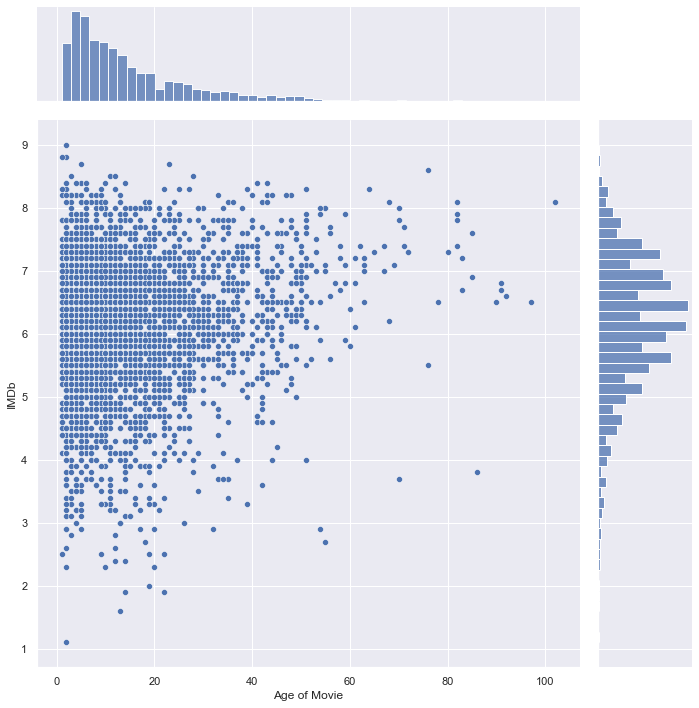

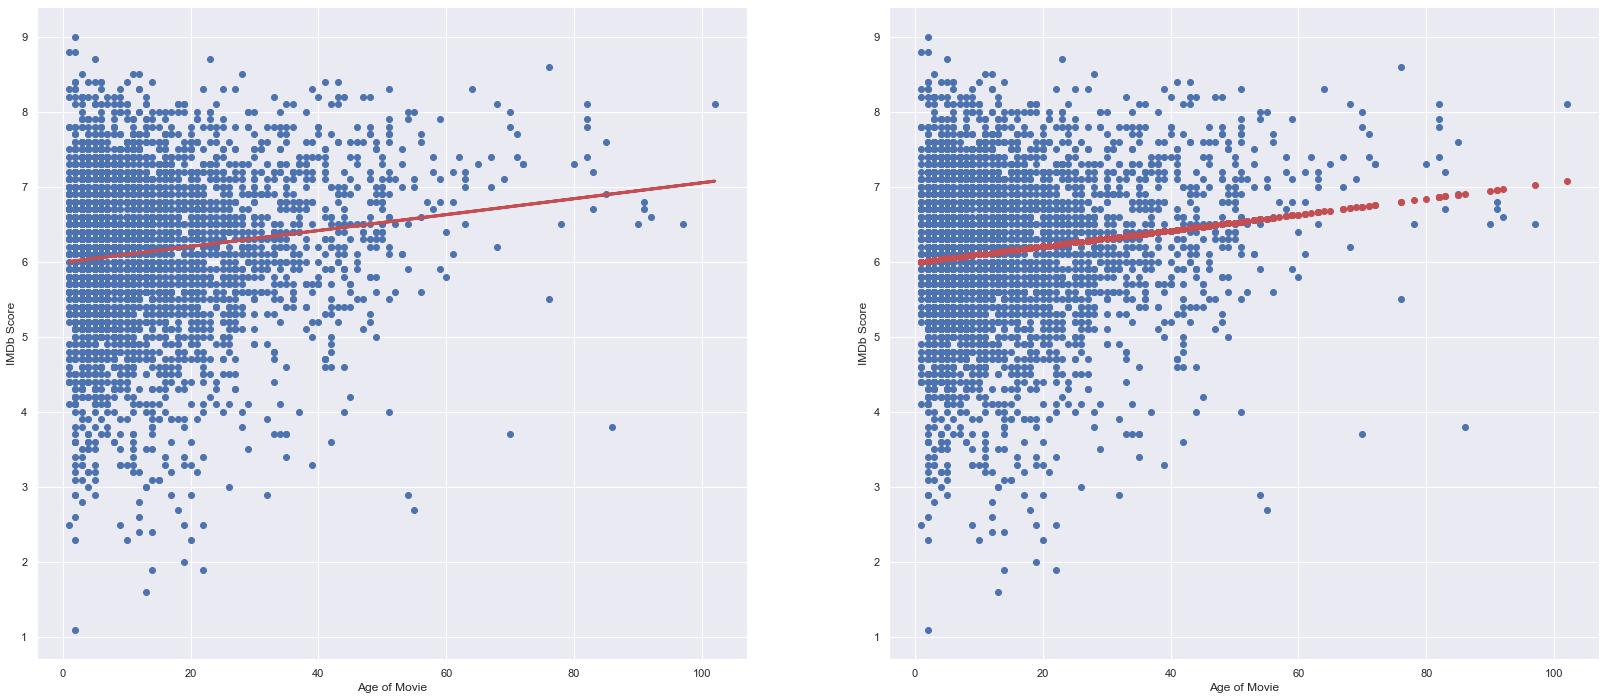

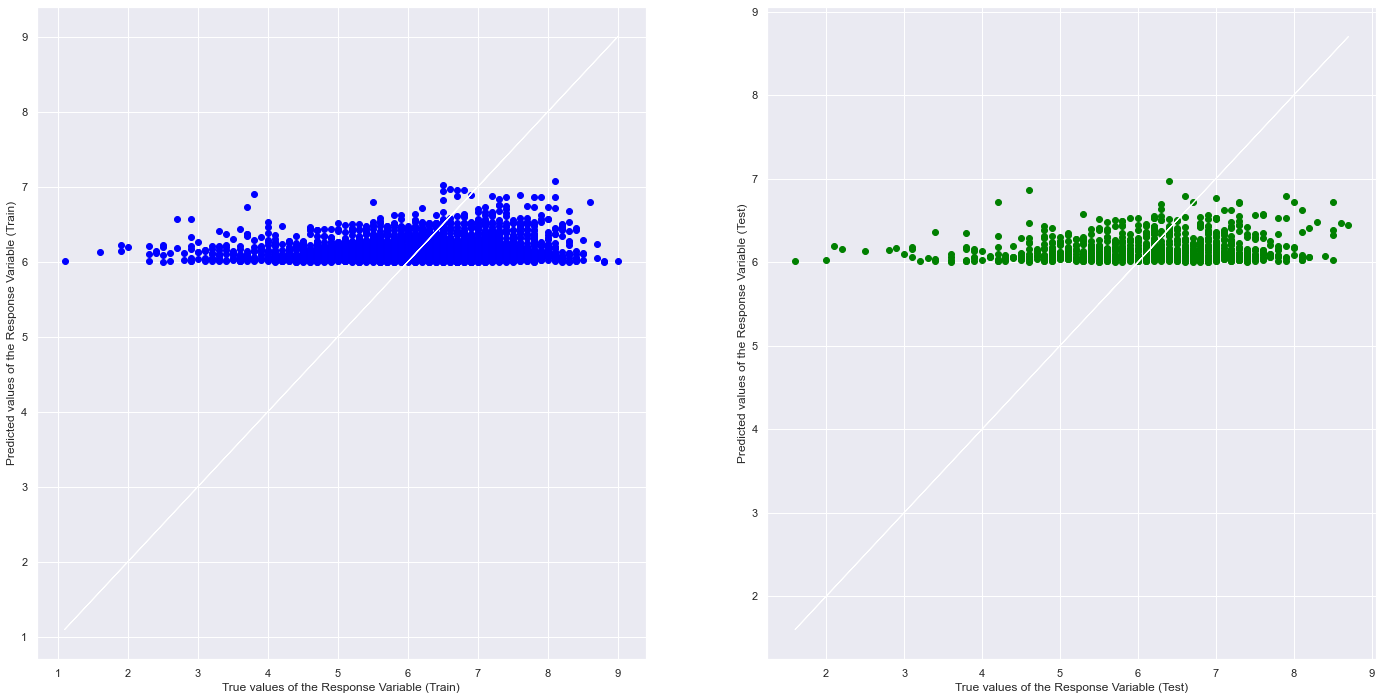

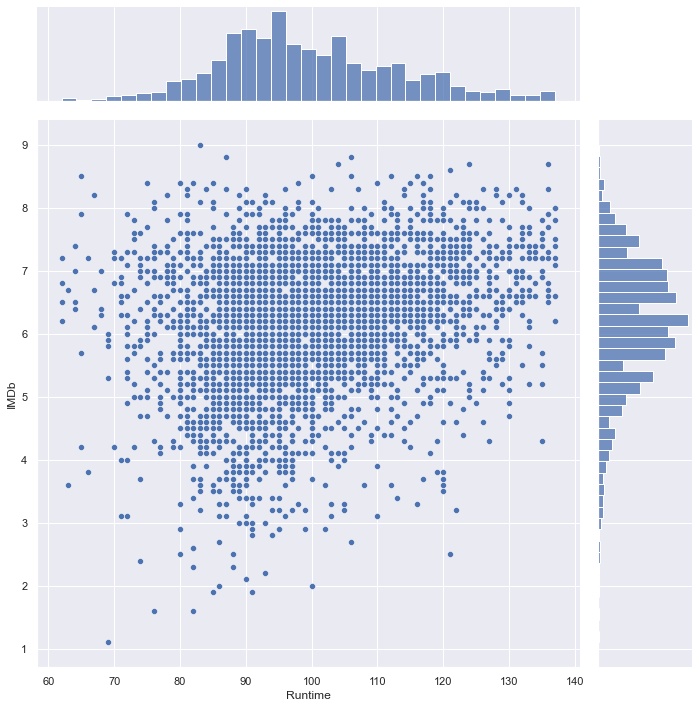

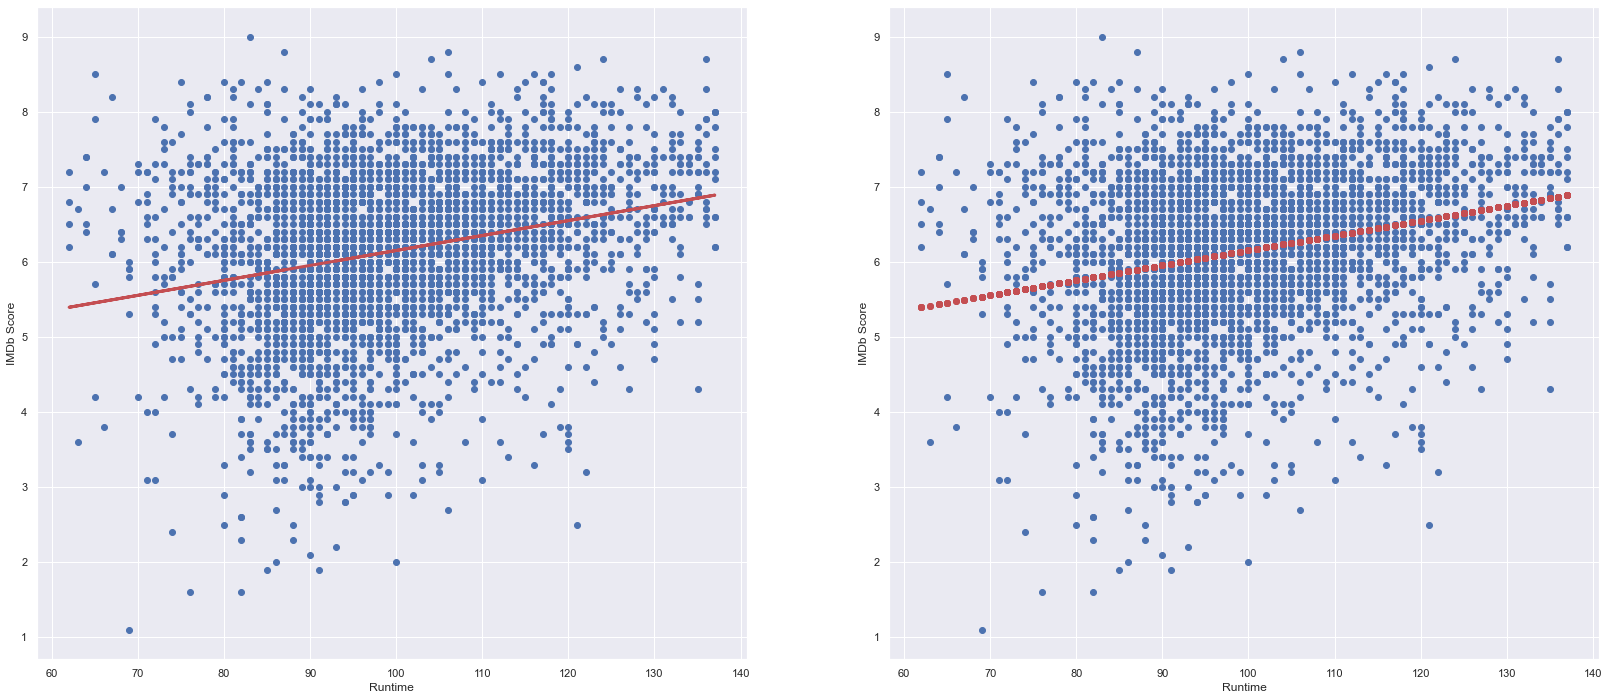

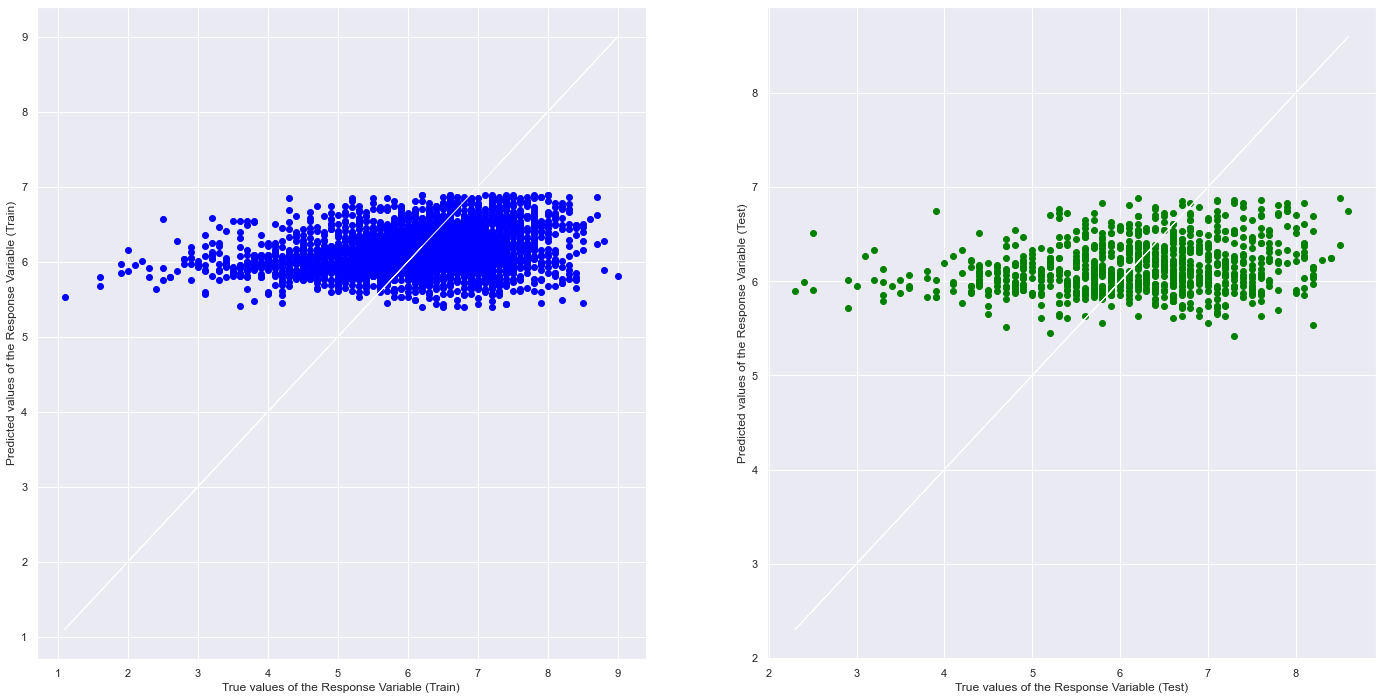

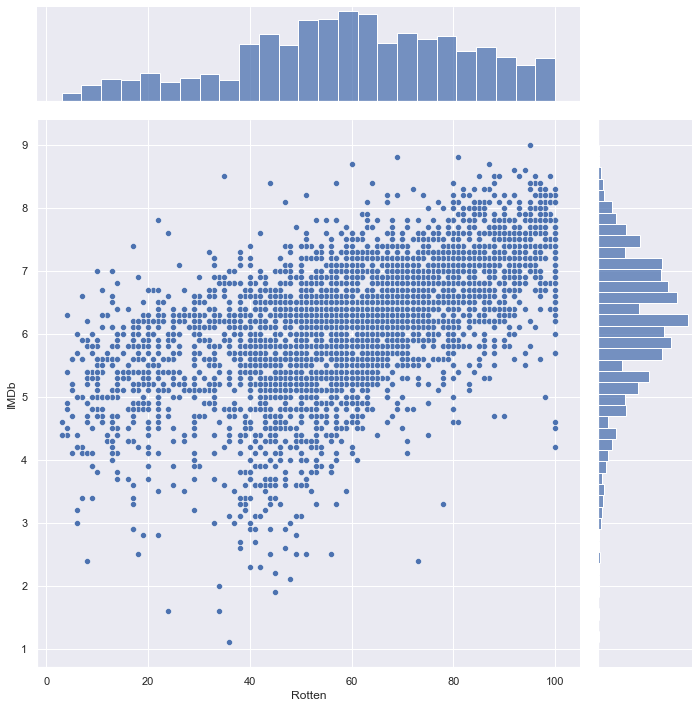

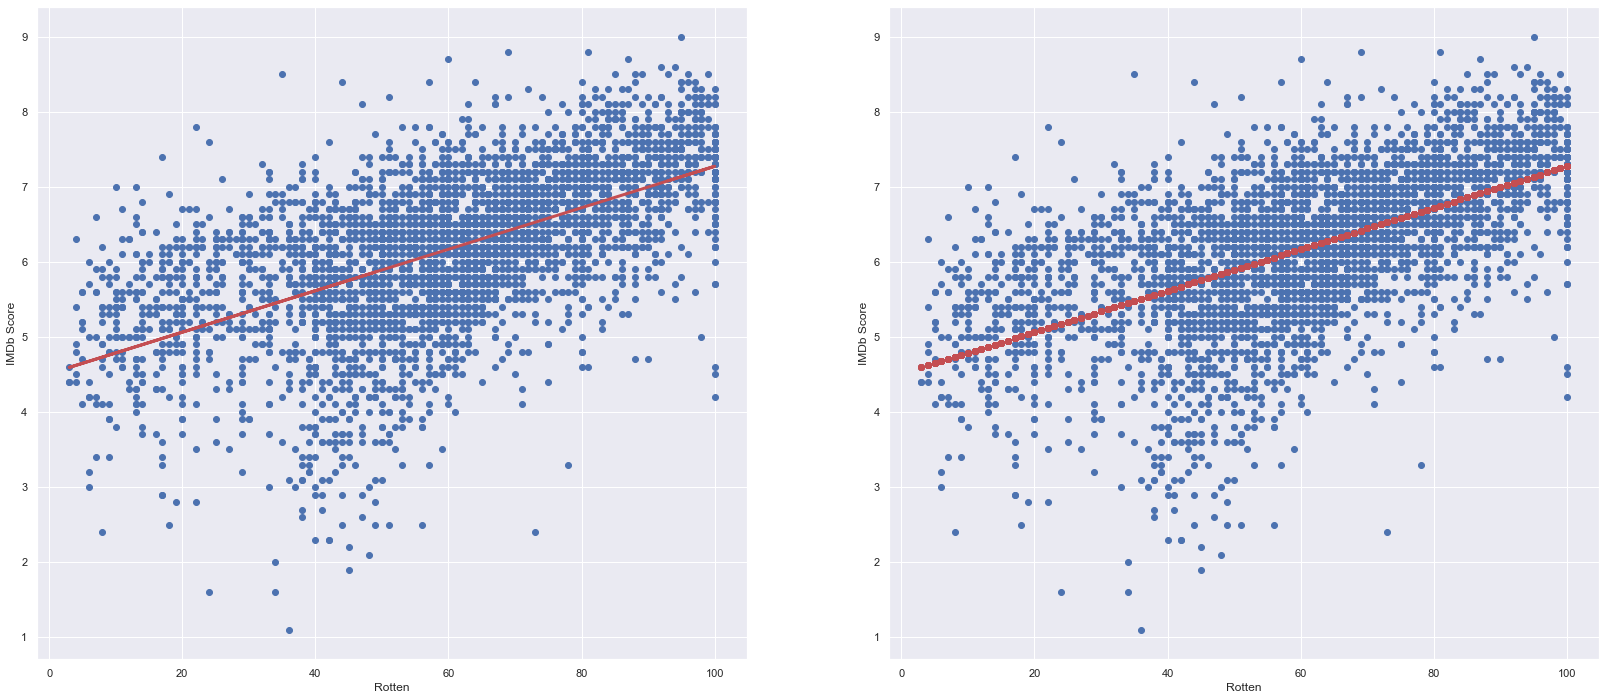

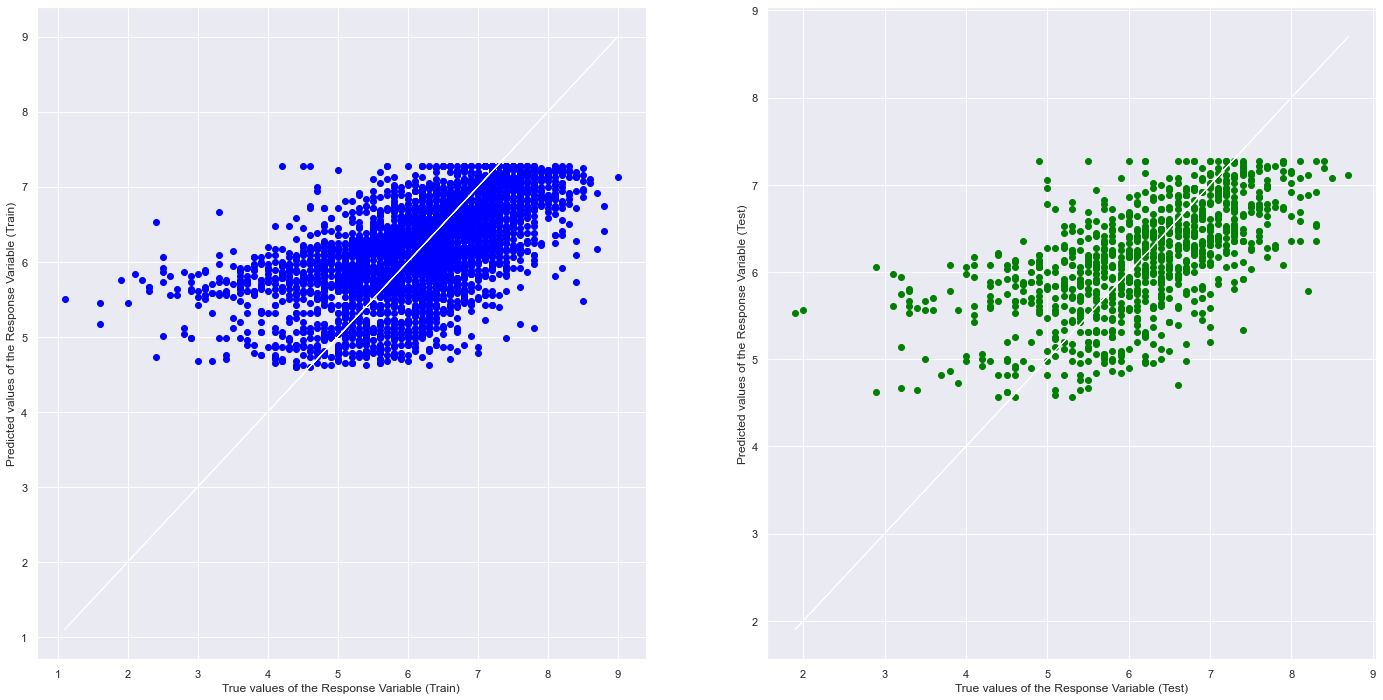

In [8]:
# Recall the Total-HP Dataset
IMDbScore = pd.DataFrame(moviedata['IMDb'])          # Response
Features = ['Age of Movie', 'Runtime', 'Rotten']     # Predictor

mse_train_list = []
mse_test_list = []

for col in Features:
    # Split the Dataset into Train and Test (Train: 80%, Test: 20%)
    Predictor = pd.DataFrame(moviedata[col])
    X_train, X_test, y_train, y_test = train_test_split(Predictor, IMDbScore, train_size = 0.8)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept ({}):     b = {}'.format(col, linreg.intercept_))
    print('Coefficients ({}):  a = {}'.format(col, linreg.coef_))
    print()

    # Create a joint dataframe by concatenating the two variables
    jointdf = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    jointdf1 = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    # Calculate the correlation between the two columns/variables
    print(jointdf.corr())
    print()

    # Jointplot of Total Train against HP Train
    sb.jointplot(data = jointdf1, x = col, y = "IMDb", height = 10)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    y_train_pred = linreg.predict(X_train)

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(28, 12))

    axes[0].scatter(X_train, y_train)
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("IMDb Score")

    axes[1].scatter(X_train, y_train)
    axes[1].scatter(X_train, y_train_pred, color = "r")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("IMDb Score")

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print("Goodness of Fit of {} (Train)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mse_train)
    mse_train_list.append((col, mse_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print("Goodness of Fit of {} (Test)".format(col))
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mse_test)
    mse_test_list.append((col, mse_test))
    print('\n' * 2)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [9]:
# Find the variable with the most accurate model (the model whose MSE is the smallest)
def most_accurate(mse_train_list, mse_test_list):
    a = []
    b = []
    
    for i in mse_train_list:
        a.append(i[1])
    
    for i in mse_test_list:
        b.append(i[1]) 
        
    best_train = min(a)
    best_test = min(b)
   
    for i in range(0, len(mse_train_list)):
        if mse_train_list[i][1] == best_train:
            best_train = mse_train_list[i]
            
    for i in range(0, len(mse_test_list)):
        if mse_test_list[i][1] == best_test:
            best_test = mse_test_list[i]
    return best_train, best_test

In [10]:
most_accurate(mse_train_list, mse_test_list)

(('Rotten', 0.7421460085104871), ('Rotten', 0.6883140445675169))

## Conclusion

The Rotten Tomatoes Score test set had the lowest MSE value of 0.68831 and the highest R^2 value of 0.35791

Runtime had the second lowest MSE value of 1.06018 and the second highest R^2 value of 0.04865

Age of Movie had the highest MSE of 1.07068 and lowest R^2 value of 0.02200

From this, we can conclude that the Rotten Tomatoes score model is the most accurate in predicting the IMDb score, followed by Runtime, and lastly the Age of the Movie.